# Regresión logística para predicciones bancarias

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv("datasets/bank/bank.csv", sep=";")

In [92]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [93]:
data.shape

(4119, 21)

In [94]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [95]:
data["y"] = (data["y"]=="yes").astype(int) 
## y->si se ha comprado el producto
## Convierto los si y no en valores booleanos

In [96]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [97]:
data["education"].unique() 
##Campos únicos de educación, sabiendo que hay varias categorías de educación básica, lo mejor será segmentarlos 
## en una sola categoría

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [98]:
##Se cambia los valores de educación básica y se reemplaan por Basic
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

##Para mejor comprensión de los datos se cambian por otros más entendibles
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [99]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [100]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

#### 451 personas compran el producto y 3668 no lo compran

In [101]:
data.groupby("y").mean() 
##Se aplicará el promedio para las variables numéricas, de a cuerdo a los dos grupos, los que compran y los que no

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


#### Las personas de 40 años en adelante son más propensos en adquirir el producto
* pdays, días en el que el cliente fue contactado por última vez, es decir, **es menor para el caso del cliente para el que compra que para el que no efectúa la compra**; también es menor la cantidad de campañas publicitarias dirigidas para el cliente que compra

In [102]:
data.groupby("education").mean() ##Frecuencia de la compra según el nivel de educación

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia  de compra del producto')

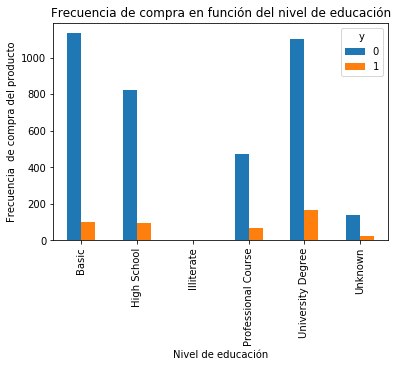

In [103]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia  de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

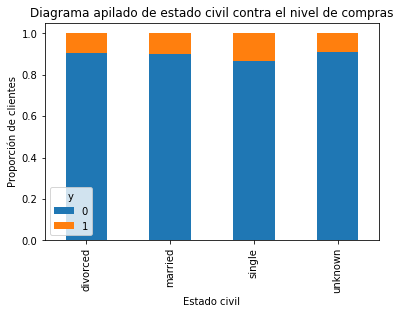

In [104]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
##Se escala entre 0 y 1 para poder visualizar mejor el nivel de la compra
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

#### Se puede visualizar que el estado civil no tiene gran influencia sobre la compra del producto

Text(0, 0.5, 'Frecuencia  de compra del producto')

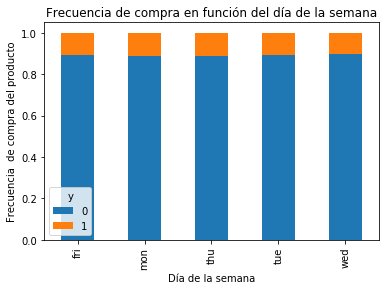

In [105]:
%matplotlib inline
table=pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia  de compra del producto")

#### La incidencia de los días de la semana sobre las ventas del producto financiero no es muy representativa

Text(0, 0.5, 'Frecuencia  de compra del producto')

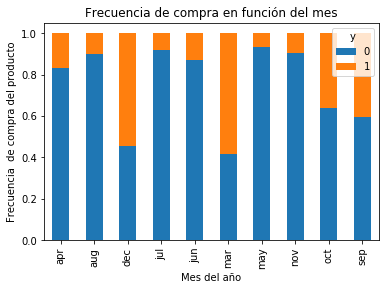

In [106]:
%matplotlib inline
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia  de compra del producto")

Text(0, 0.5, 'Frecuencia  de compra del producto')

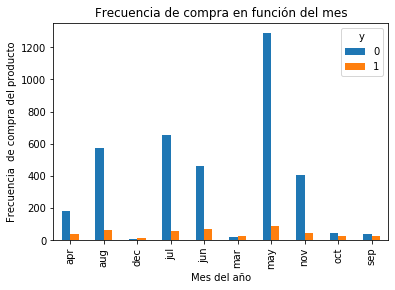

In [107]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia  de compra del producto")

Text(0, 0.5, 'Cliente')

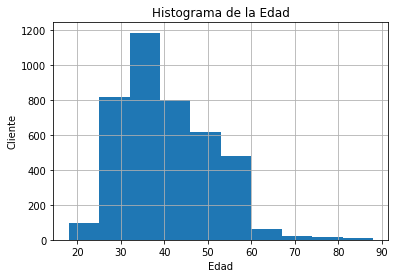

In [108]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

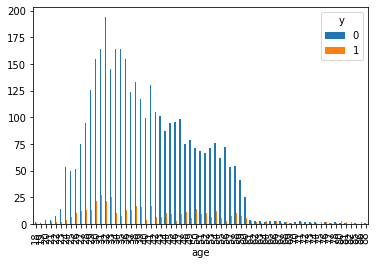

In [109]:
pd.crosstab(data.age, data.y).plot(kind="bar")

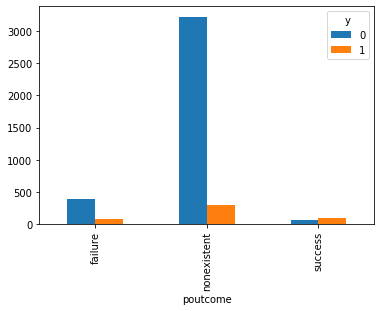

In [110]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")
## poutcome es quien ha comprado antes

#### Los que han realizado una compra previa tienen mayor tendencia a realizar más inversiones

### Conversión de las variables categóricas a dummies

In [111]:
categories =["job", "marital", "education", "housing", "loan", 
             "contact", "month", "day_of_week","poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [112]:
data_vars=data.columns.values.tolist()

In [113]:
to_keep = [v for v in data_vars if v not in categories]##Con las categorías que me quiero quedar
to_keep = [v for v in to_keep if v not in ["default"]] ## Se elimina default porque causa problemas

In [114]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [115]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [116]:
n = 12 
## mero de rasgos que deseas seleccionar para tu modelo, si n = 12, 
##elegirá los 12 mejores que más información aportan al modelo

In [117]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression(solver='liblinear') ## lr-> regresión logística

In [119]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [120]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [121]:
print(rfe.ranking_)

[34 41 18 42  1 14 27 25  1 38 22  3  1 35  2 36  1  5 30 33 12 45 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 44 37 28 39 29 11  1  7  1]


In [122]:
z=zip(bank_data_vars, rfe.support_, rfe.ranking_) ##Para saber cuales variables influyen más sobre el modelo

In [123]:
list(z)

[('age', False, 34),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 38),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 35),
 ('job_housemaid', False, 2),
 ('job_management', False, 36),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 40),
 ('marital_married', False, 31),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_U

In [124]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", "month_jul", "month_jun", 
      "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]
##previous->experiencia previa en una compra
##euribor3m->Valores de las acciones
##job_blue-collar->Obreros
##poutcome_nonexistent->Sin experiencia previa al invertir en el producto

In [125]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodel.api

In [126]:
import statsmodels.api as sm

In [127]:
logit_model = sm.Logit(Y, X)

In [128]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [129]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2019-07-23 01:43  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [130]:
from sklearn import linear_model

In [131]:
logit_model = linear_model.LogisticRegression(solver='liblinear')
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
logit_model.score(X,Y)

0.8963340616654528

In [133]:
1-Y.mean() ##Promedio de los que compran el producto

0.8905074047098811

In [134]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_)))) ##Coeficientes de cada variable

,0,1
0,previous,[0.5076571354738983]
1,euribor3m,[-0.5464961321928495]
2,job_blue-collar,[-0.35915536216915755]
3,job_retired,[0.35603838879113187]
4,month_aug,[0.6253983086707797]
5,month_dec,[1.1822172986008772]
6,month_jul,[0.9622633628012134]
7,month_jun,[1.054317924905875]
8,month_mar,[1.6306366297885992]
9,month_nov,[0.4519576818465317]


### Validación del modelo logístico

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state=0)

In [137]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
from IPython.display import display, Math, Latex

In [139]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [140]:
probs = lm.predict_proba(X_test)##

In [141]:
probs 
##La primera columna da la probabilidad de como de seguro estoy de lo que estoy diciendo
##La segunda columna da la probabilidad del valor de salida

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [142]:
prediction = lm.predict(X_test)

In [143]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
 display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq\ \varepsilon\\1&si\  p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [145]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1 ##Con un 10% de probabilidades
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [146]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


* 846 **NO** compradores de *390* compradores probables

In [147]:
390/len(prob_df)*100

31.55339805825243

In [148]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


In [149]:
331/len(prob_df)*100

26.779935275080906

In [150]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [151]:
732/len(prob_df)*100

59.22330097087378

In [152]:
from sklearn import metrics

In [153]:
metrics.accuracy_score(Y_test, prediction)
##Eficacia del 90%

0.9004854368932039

## Validación cruzada

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
scores = cross_val_score(linear_model.LogisticRegression(solver="liblinear"), X, Y, scoring="accuracy", cv=10)

In [156]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

In [157]:
scores.mean()##Eficacia del 89.4%

0.8943884240990478

## Matrices de Confusión y curvas de ROC

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)

In [159]:
lm = linear_model.LogisticRegression(solver='liblinear')
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
probs = lm.predict_proba(X_test)

In [161]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1 ##Nivel de sensibilidad
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)##Se convierte en lista para que pierda los índices que tuviera antes
prob_df

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0
5,0.026165,0,0
6,0.026193,0,0
7,0.203873,1,0
8,0.060122,0,0
9,0.077980,0,0


In [162]:
confusion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [163]:
    TN=confusion_matrix[0][0]## true negative
    TP=confusion_matrix[1][1]## true positive
    FP=confusion_matrix[0][1]## false positive
    FN=confusion_matrix[1][0]## false negative

* La tasa de verdaderos positivos son 82 ->[1][1]
* La tasa de verdaderos negativos son 806 -> [0][0]
* Los falsos positivos son 40 -> [0][1]
* Los falsos negativos son 308 -> [1][0]

In [164]:
sens = TP/(TP+FN)##Sensibilidad
sens

0.6721311475409836

In [165]:
espec_1 = 1-TN/(TN+FP)   #especificidad
espec_1

0.2764811490125674

In [166]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
#Cuando el threshold incrementa, tanto la sensibilidad como 1-especifidad decrecen
sensitivities = [1]
especifities_1 = [1]##El primer elemento es un uno
for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]## true negative
    TP=confusion_matrix[1][1]## true positive
    FP=confusion_matrix[0][1]## false negative
    FN=confusion_matrix[1][0]## false positive
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espec_1 = 1-TN/(TN+FP)   #especificidad
    especifities_1.append(espec_1)
    
sensitivities.append(0)
especifities_1.append(0)##Último elemento es un cero

In [167]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [168]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

In [169]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

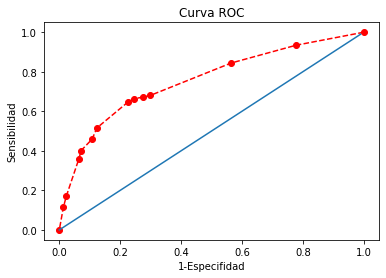

In [170]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [174]:
from sklearn import metrics

from ggplot import *

In [175]:
espec_1, sensitivities, _ = metrics.roc_curve(Y_test, prob)

In [176]:
sensitivities

array([0.        , 0.00819672, 0.02459016, 0.03278689, 0.03278689,
       0.04918033, 0.04918033, 0.05737705, 0.05737705, 0.07377049,
       0.07377049, 0.08196721, 0.08196721, 0.1147541 , 0.1147541 ,
       0.12295082, 0.12295082, 0.12295082, 0.13114754, 0.13114754,
       0.13934426, 0.13934426, 0.16393443, 0.16393443, 0.17213115,
       0.17213115, 0.18032787, 0.18032787, 0.18852459, 0.18852459,
       0.19672131, 0.19672131, 0.19672131, 0.19672131, 0.19672131,
       0.19672131, 0.21311475, 0.21311475, 0.23770492, 0.23770492,
       0.24590164, 0.27868852, 0.28688525, 0.28688525, 0.31147541,
       0.31147541, 0.32786885, 0.32786885, 0.3442623 , 0.3442623 ,
       0.3442623 , 0.3442623 , 0.35245902, 0.35245902, 0.36065574,
       0.36065574, 0.36885246, 0.36885246, 0.37704918, 0.37704918,
       0.39344262, 0.39344262, 0.40163934, 0.40163934, 0.41803279,
       0.41803279, 0.43442623, 0.43442623, 0.45081967, 0.45081967,
       0.45901639, 0.45901639, 0.45901639, 0.45901639, 0.45901

In [177]:
df = pd.DataFrame({
    "esp":espec_1,
    "sens":sensitivities
})

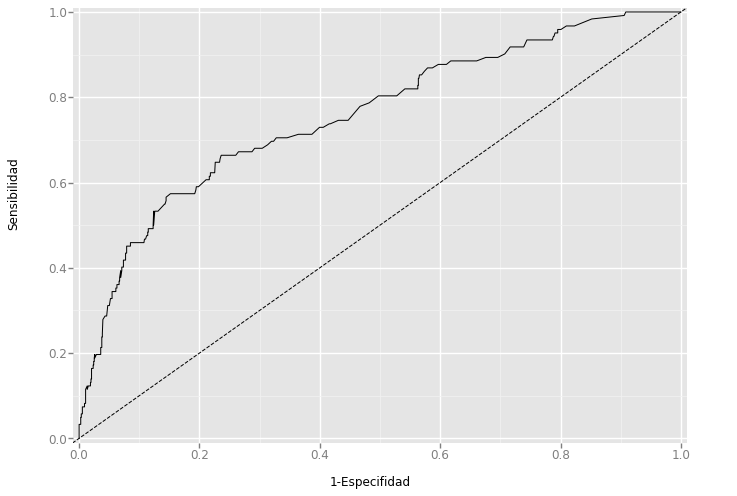

<ggplot: (8756671547368)>

In [178]:
ggplot(df, aes(x="esp", y="sens"))+ geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [179]:
auc = metrics.auc(espec_1, sensitivities) ##Dibujar el área bajo la curva
auc

0.7575712982311564

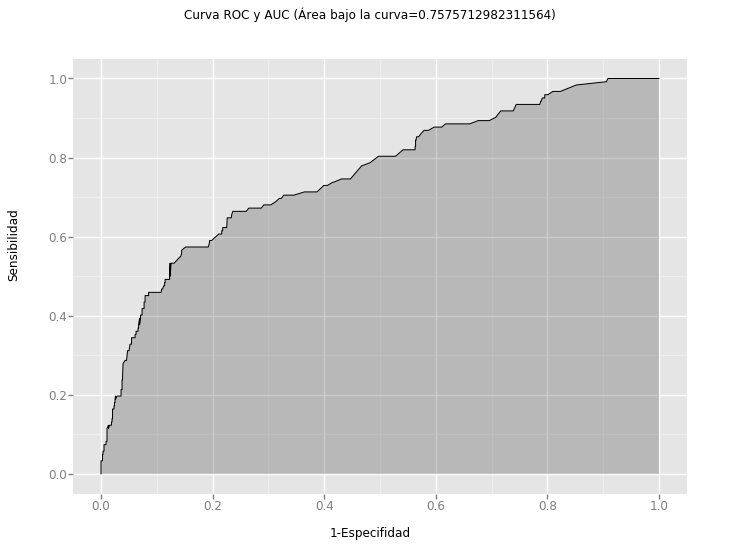

<ggplot: (8756671480973)>

In [182]:
ggplot(df, aes(x="esp",y="sens")) + geom_area(alpha=0.25)+geom_line(aes(y="sens"))+ggtitle("Curva ROC y AUC (Área bajo la curva=%s)" % str(auc))+xlab("1-Especifidad")+ylab("Sensibilidad")